In [26]:
import serial
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft
import math

dataWalk = pd.read_csv("../All_Data/20220117走路data/手25sec1470cm41step.csv")
dataWalk = np.array(dataWalk)

dataTake= pd.read_csv("../All_Data/220304拿放水壺(坐著)/手2022-03-04 114800.csv")
dataTake = np.array(dataTake)

lengthOfWalk=[]
for i in range(len(dataWalk[:,1])):
    lengthOfWalk.append(i)
lengthOfTake=[]
for i in range(len(dataTake[:,1])):
    lengthOfTake.append(i)


跑出讀入的資料

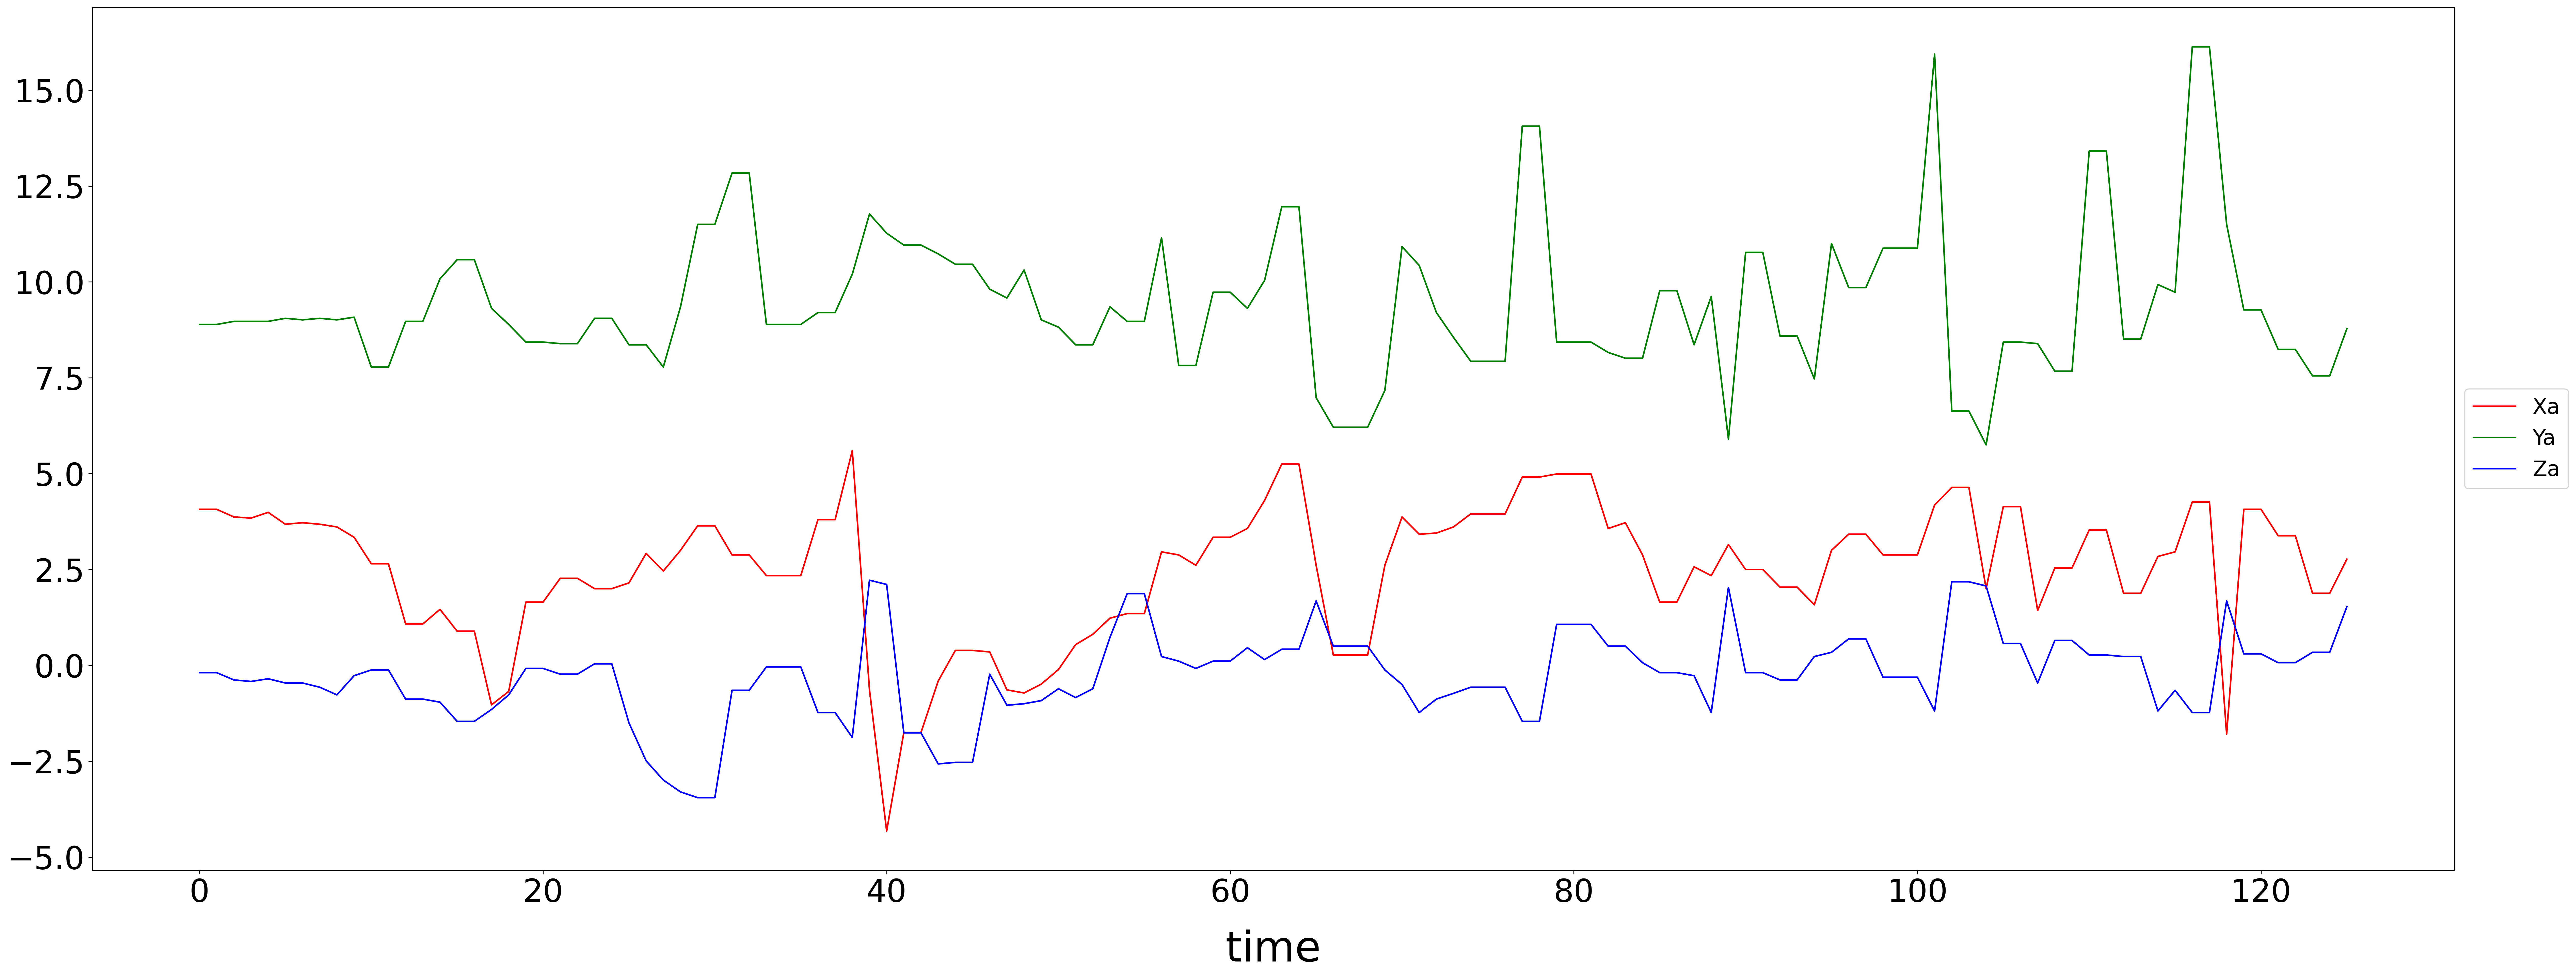

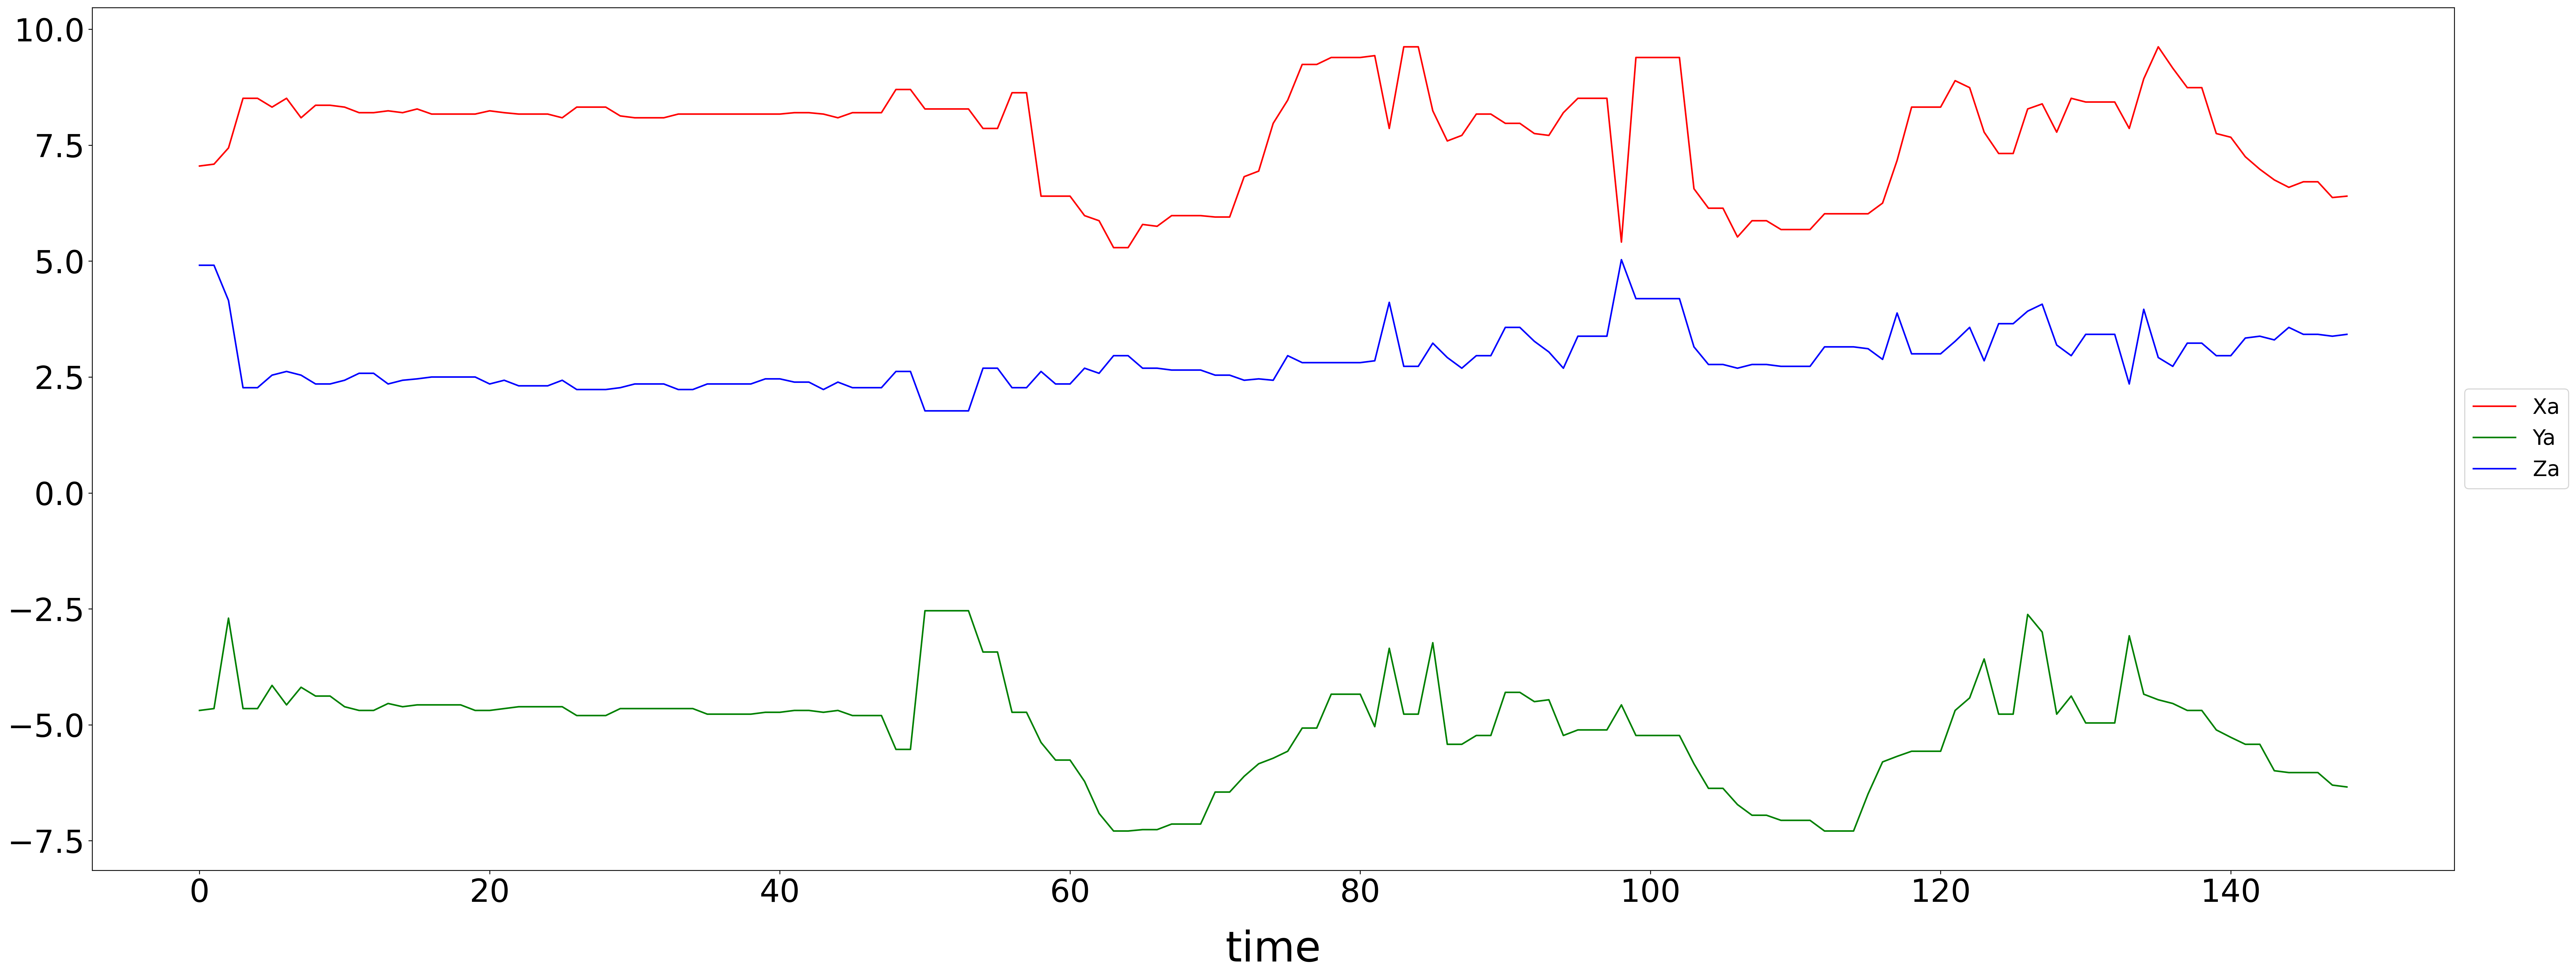

In [27]:
# show all data
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(lengthOfWalk, dataWalk[:,7], color = 'r', label = "Xa")
plt.plot(lengthOfWalk, dataWalk[:,8], color = 'g', label = "Ya")
plt.plot(lengthOfWalk, dataWalk[:,9], color = 'b', label = "Za")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()

# show all data
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(lengthOfTake, dataTake[:,7], color = 'r', label = "Xa")
plt.plot(lengthOfTake, dataTake[:,8], color = 'g', label = "Ya")
plt.plot(lengthOfTake, dataTake[:,9], color = 'b', label = "Za")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()

Merge Data

In [28]:
startIndex=7
dataLength=50000

mergeData=[[],[],[]]
for index in range(startIndex, startIndex+3):
    bigDataTake=[]
    bigDataWalk=[]
    for i in range (int((dataLength/len(dataWalk[:,index])))):
        bigDataWalk.append(dataWalk[:,index])
    for i in range (int((dataLength/len(dataTake[:,index])))):
        bigDataTake.append(dataTake[:,index])

    mergeData[index-startIndex]=np.append(bigDataWalk,bigDataTake)
lengthOfMergeData=[]
for i in range(len(mergeData[0])):
    lengthOfMergeData.append(i)





99811


Show merged data

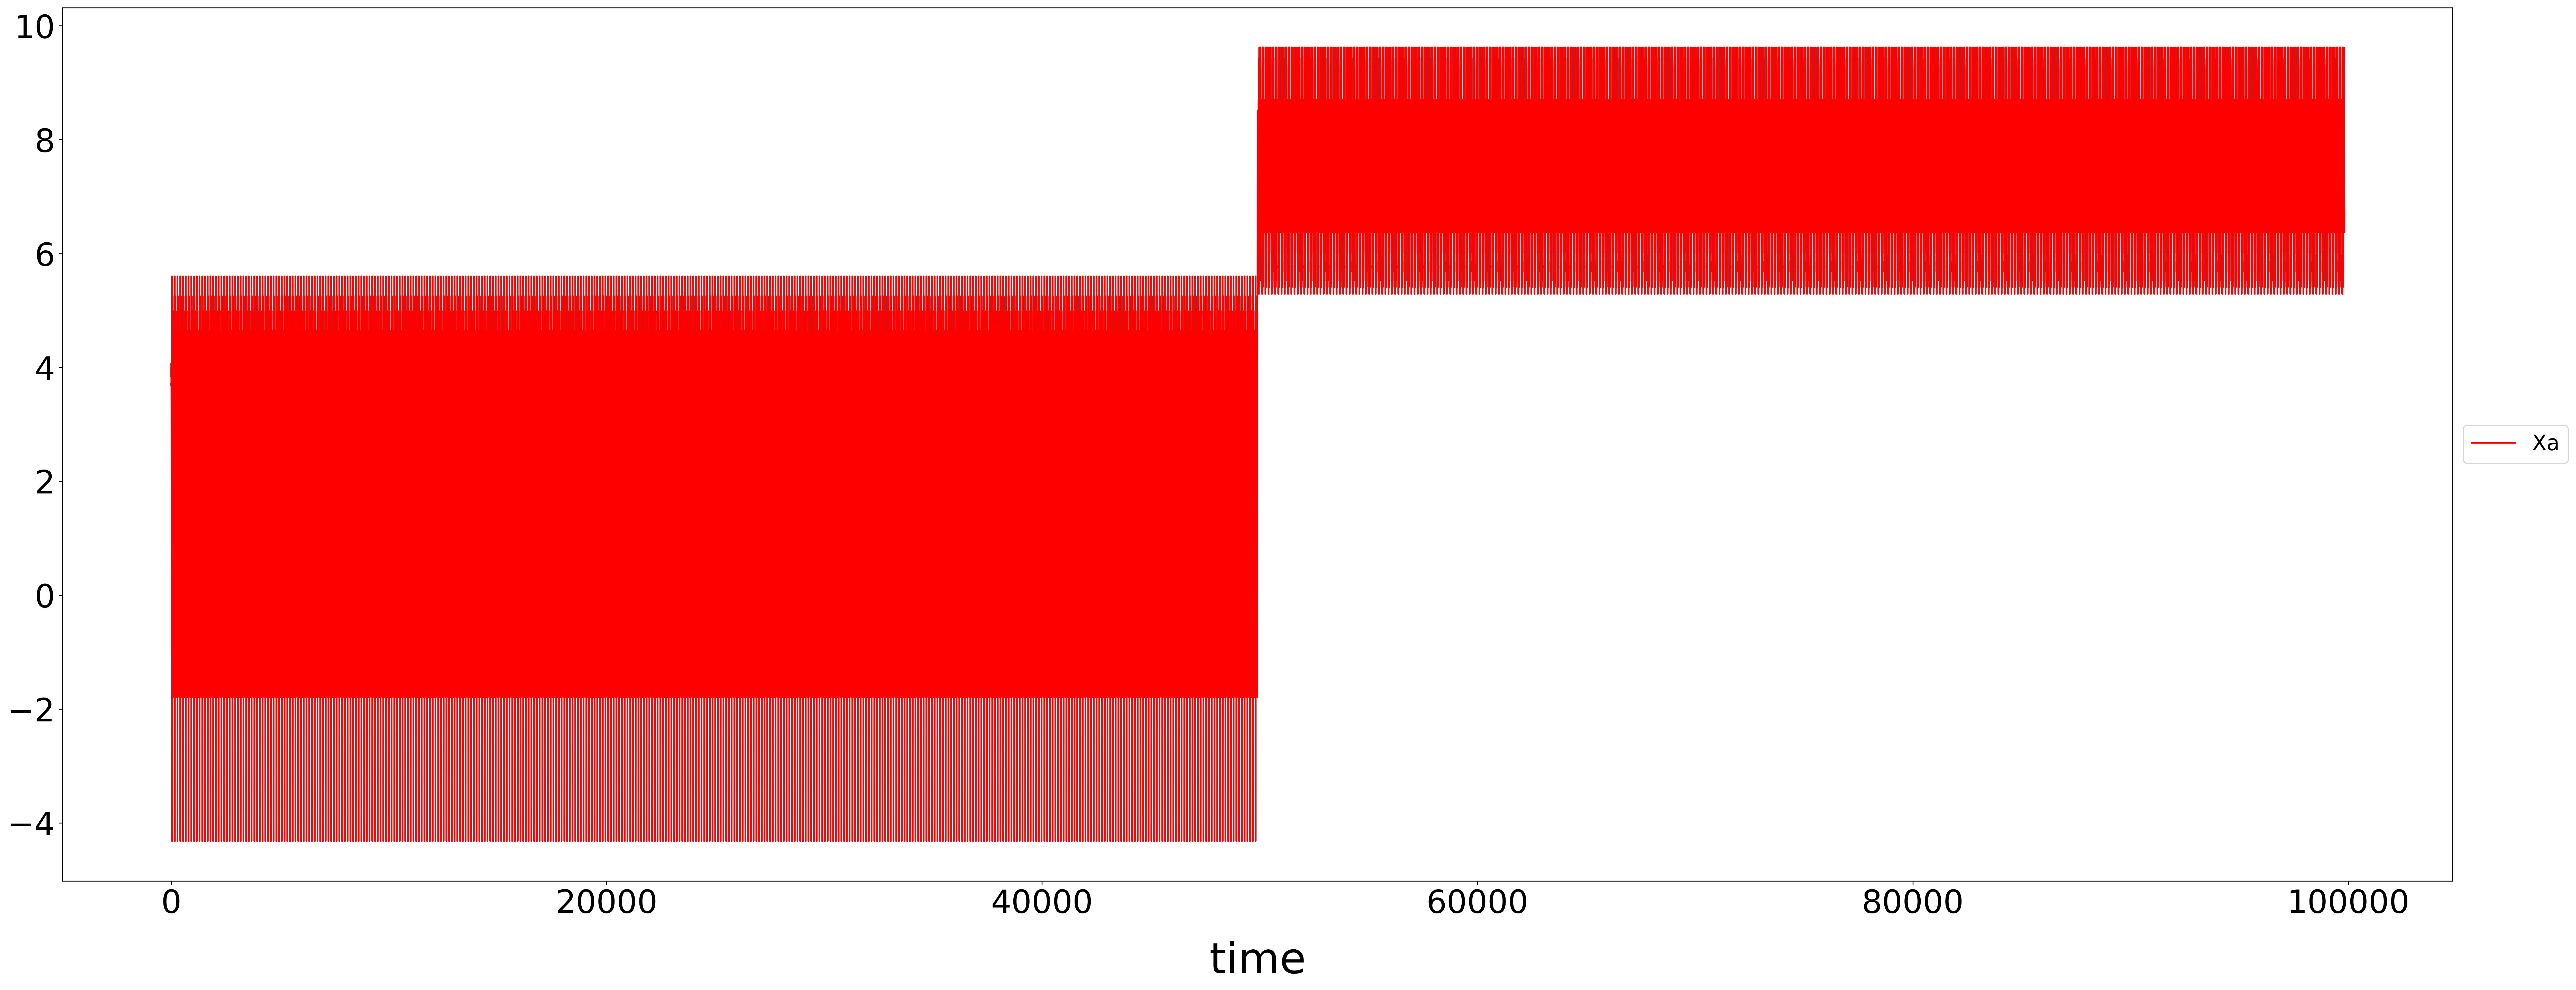

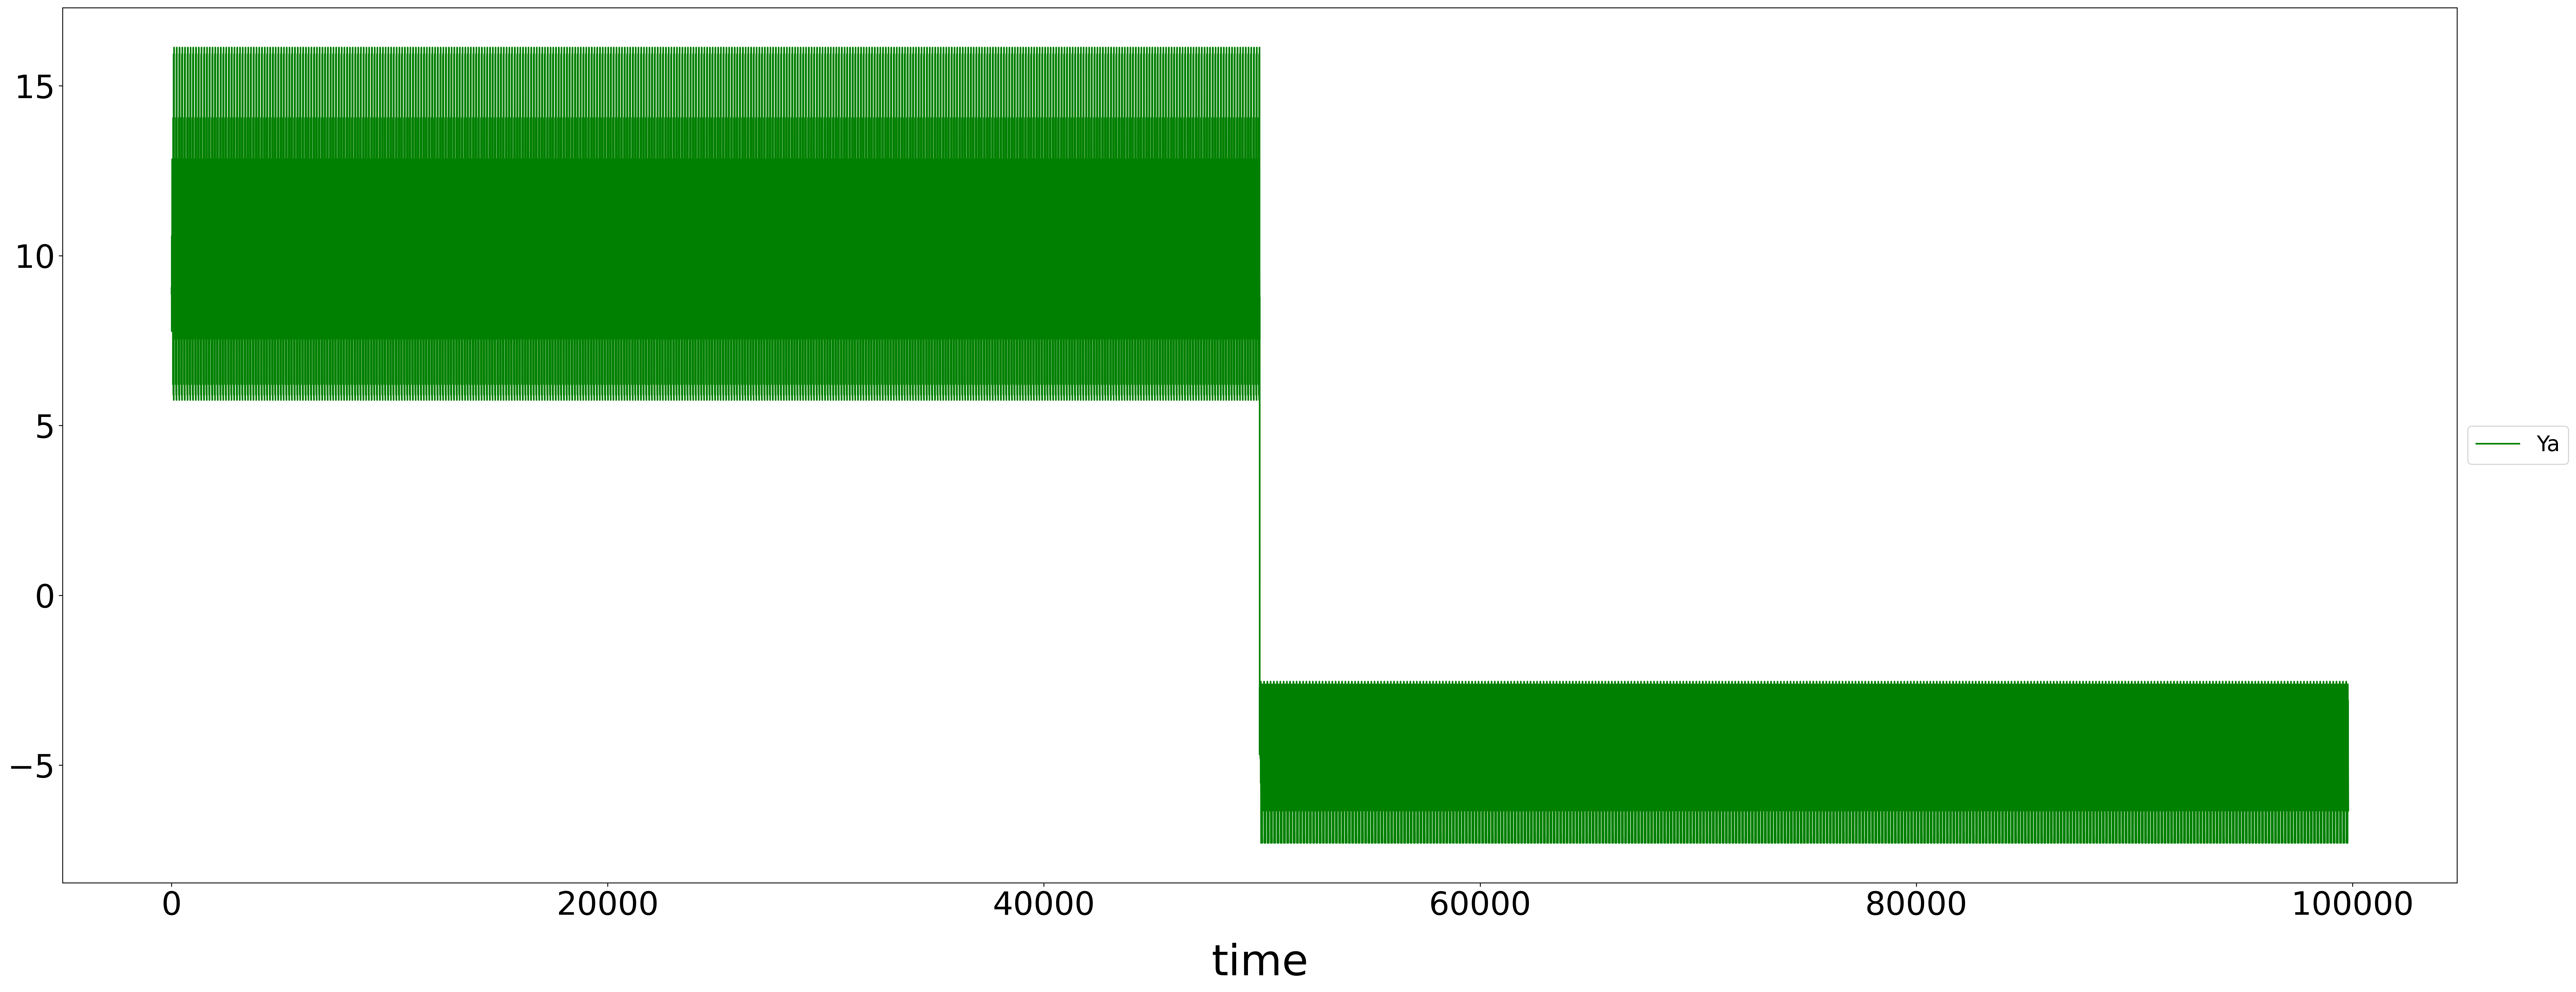

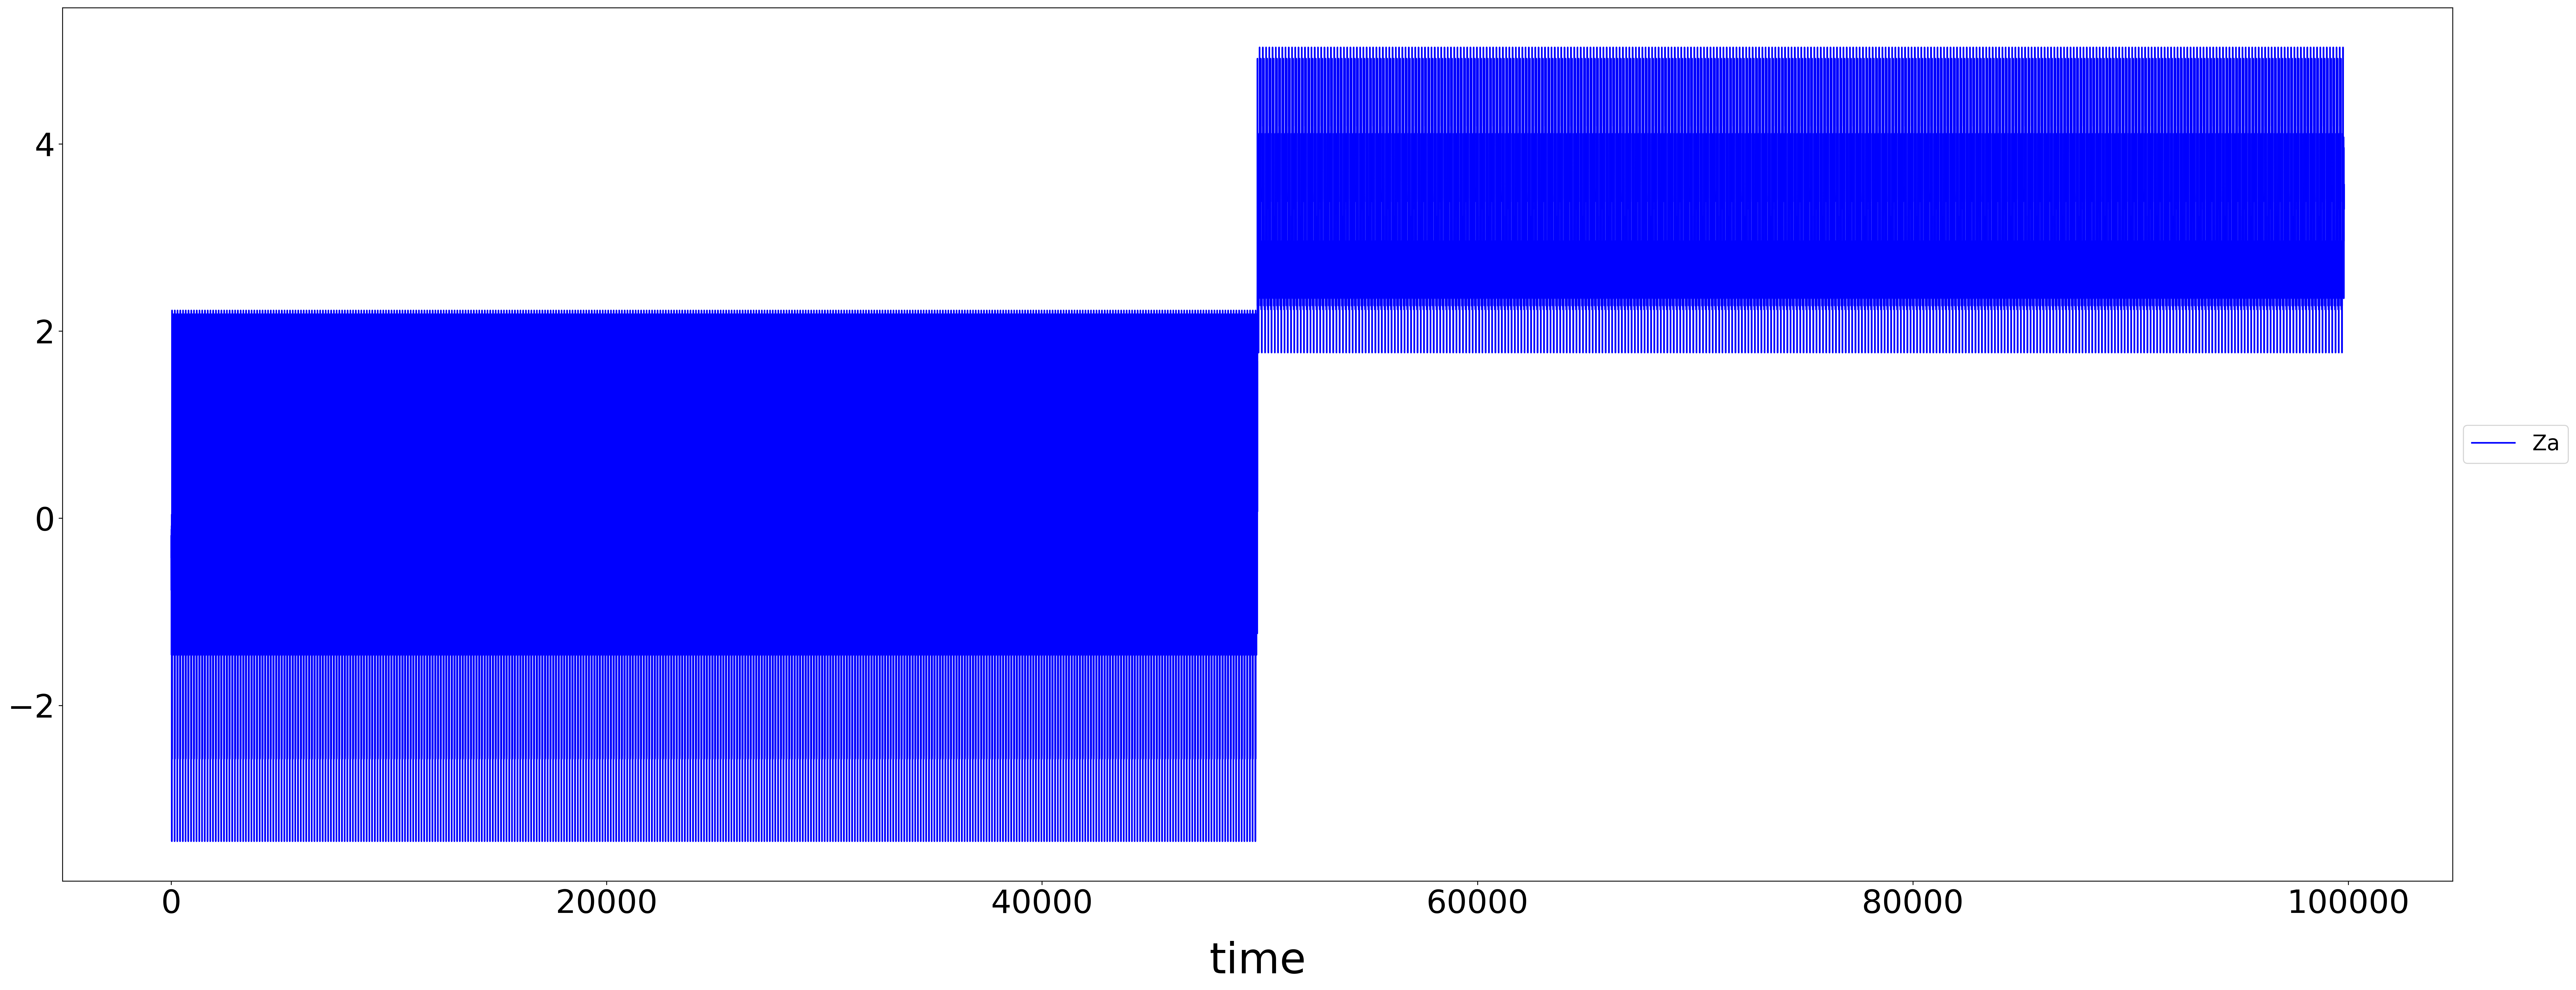

In [29]:
# show all data
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(lengthOfMergeData, mergeData[0], color = 'r', label = "Xa")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()
# show all data
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(lengthOfMergeData, mergeData[1], color = 'g', label = "Ya")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()
# show all data
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(lengthOfMergeData, mergeData[2], color = 'b', label = "Za")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()

Show spectrum of merged data

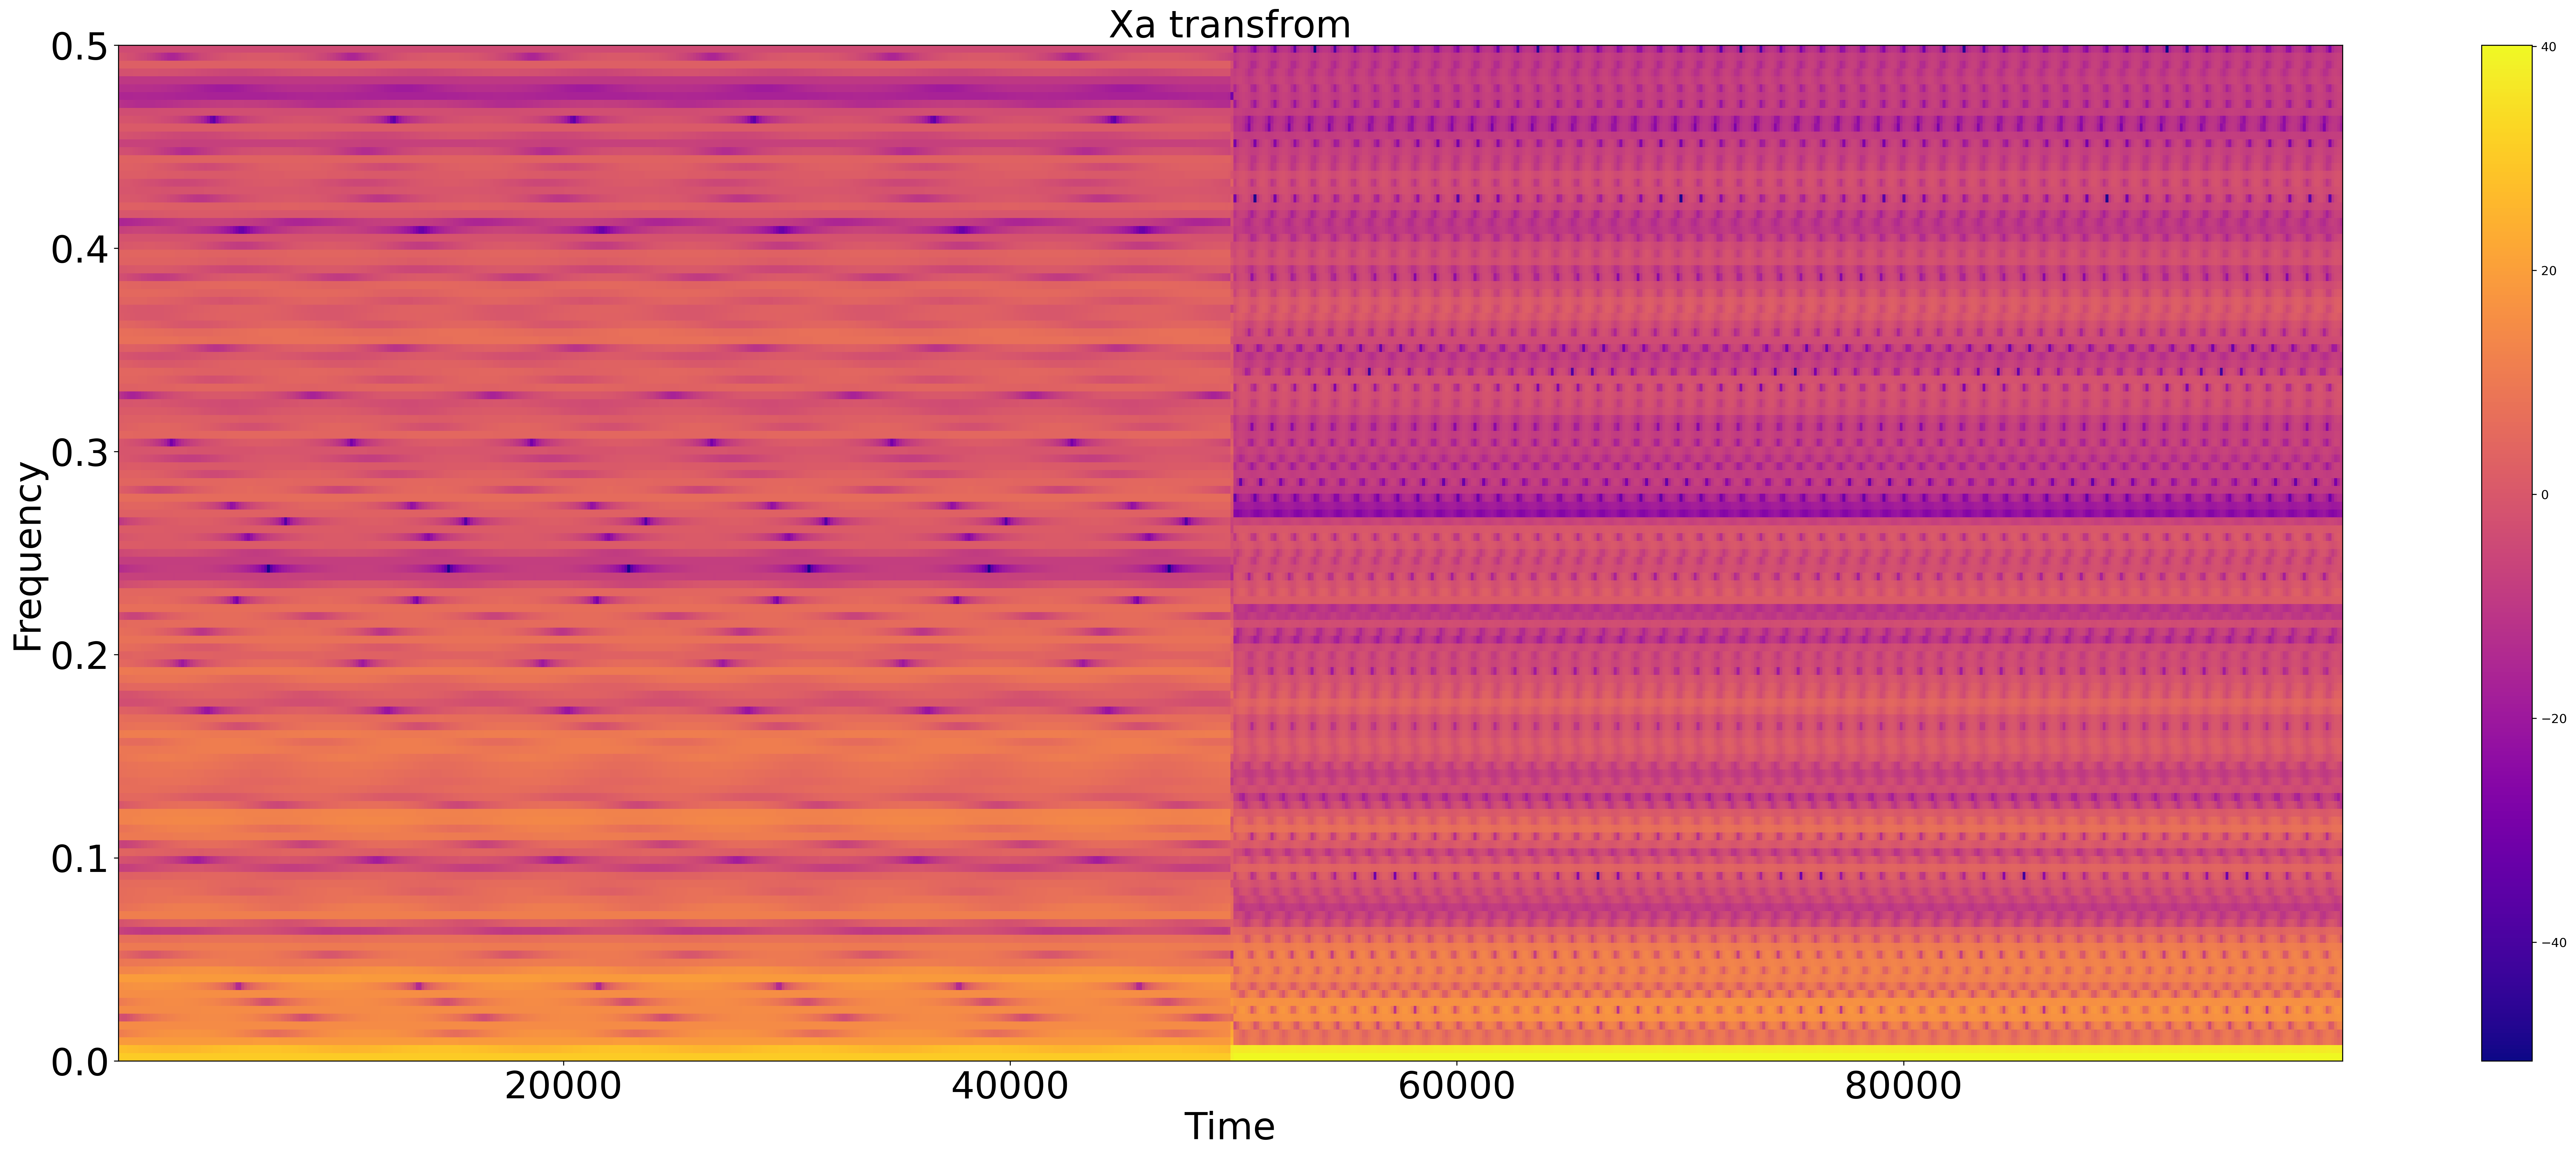

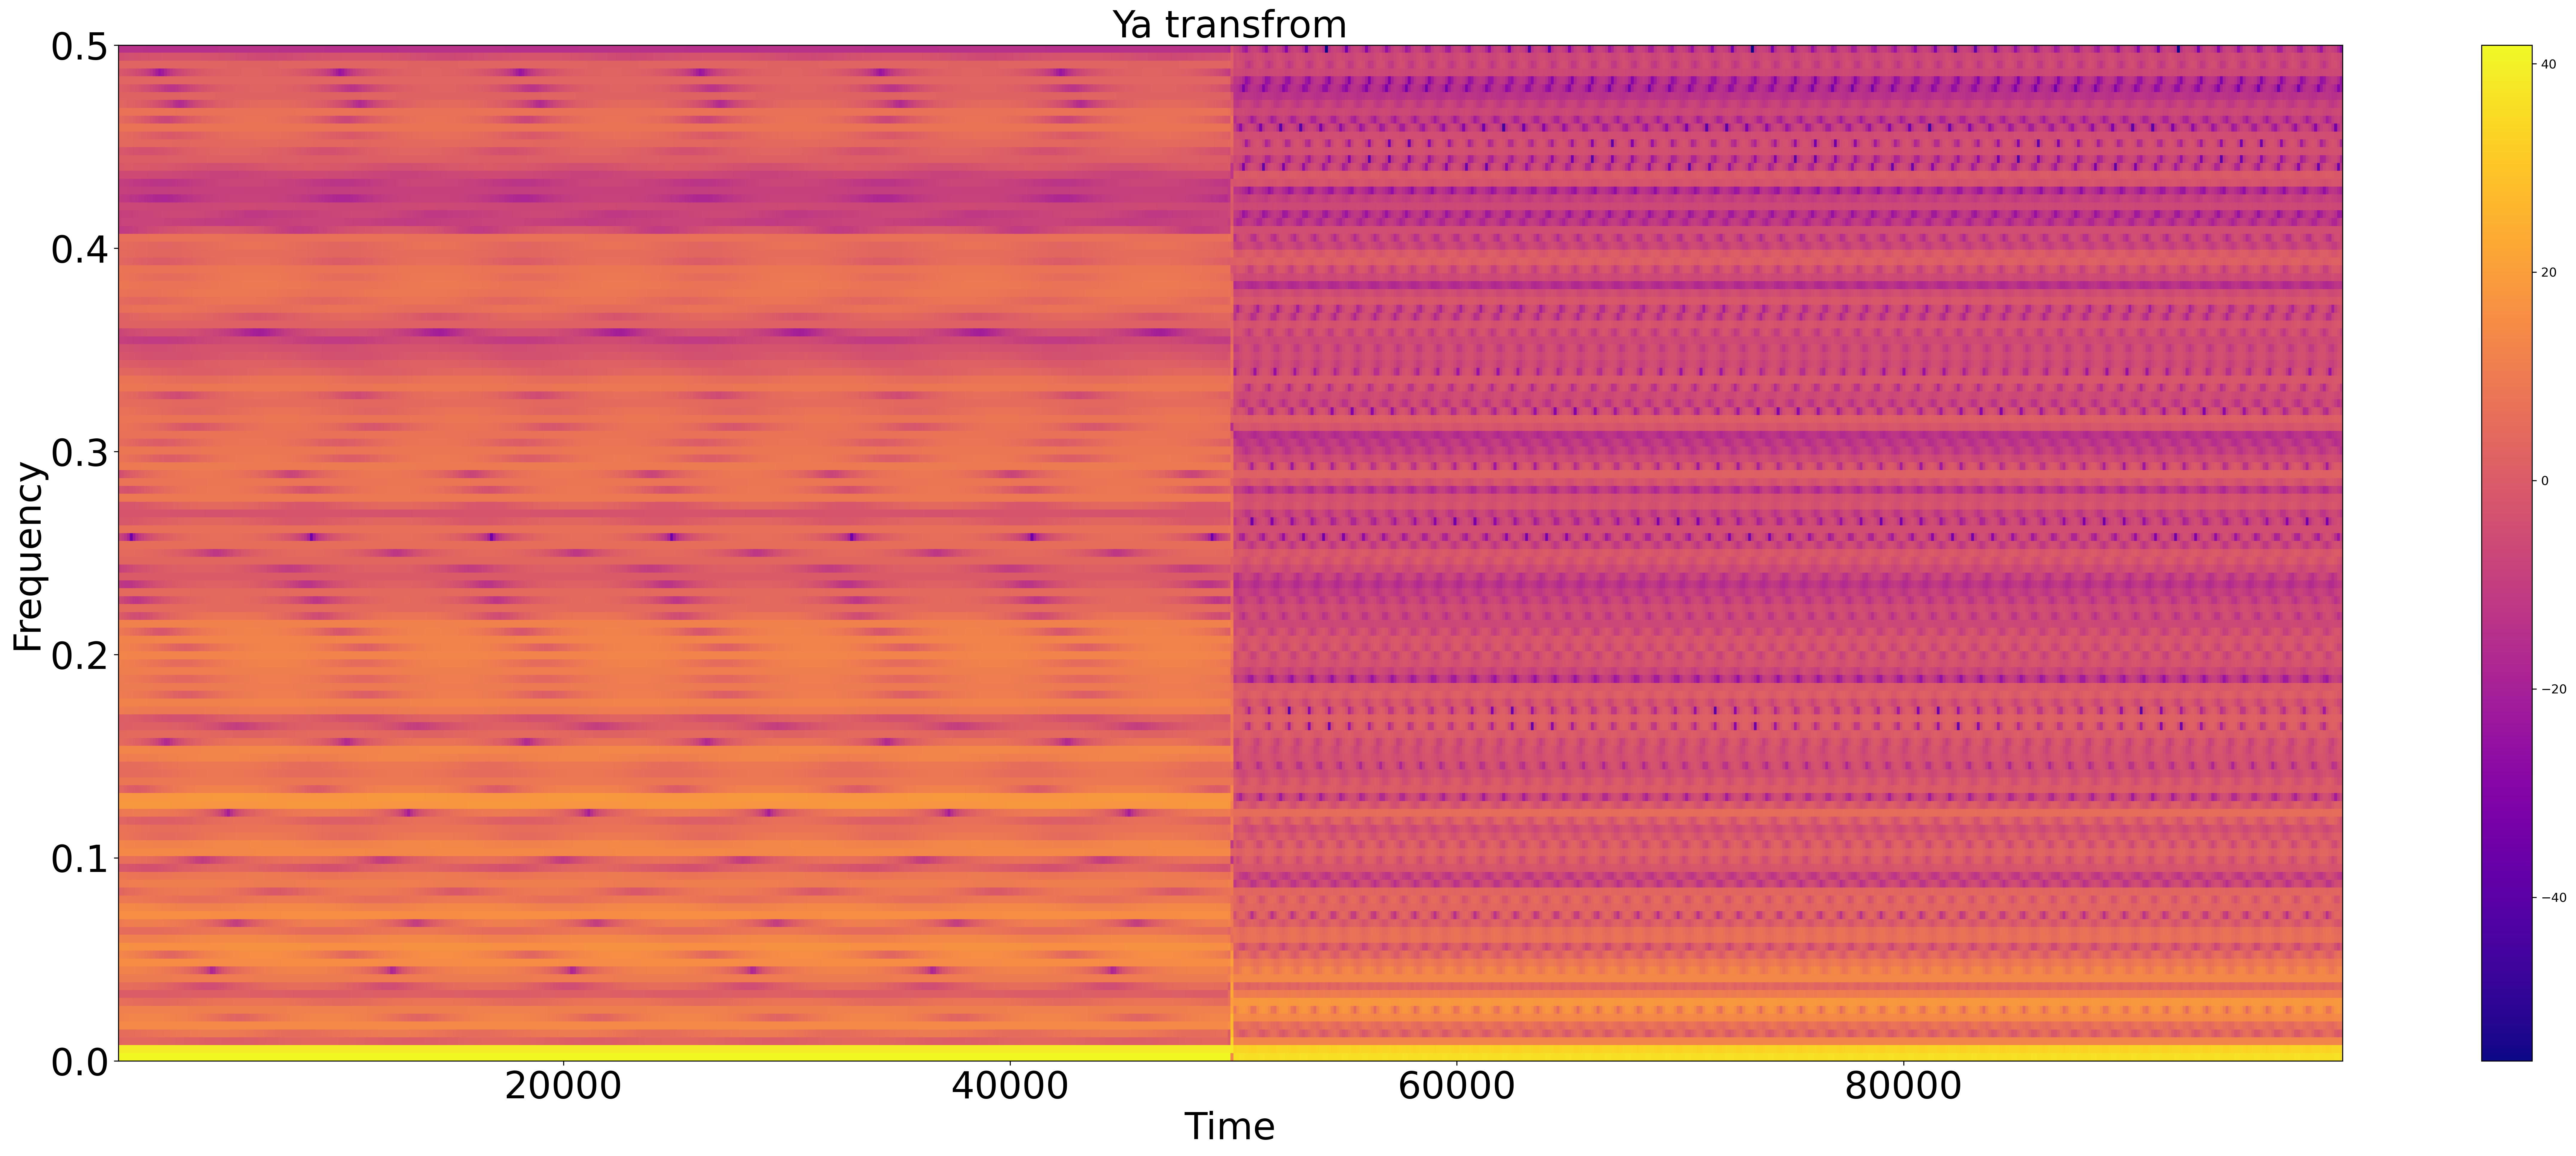

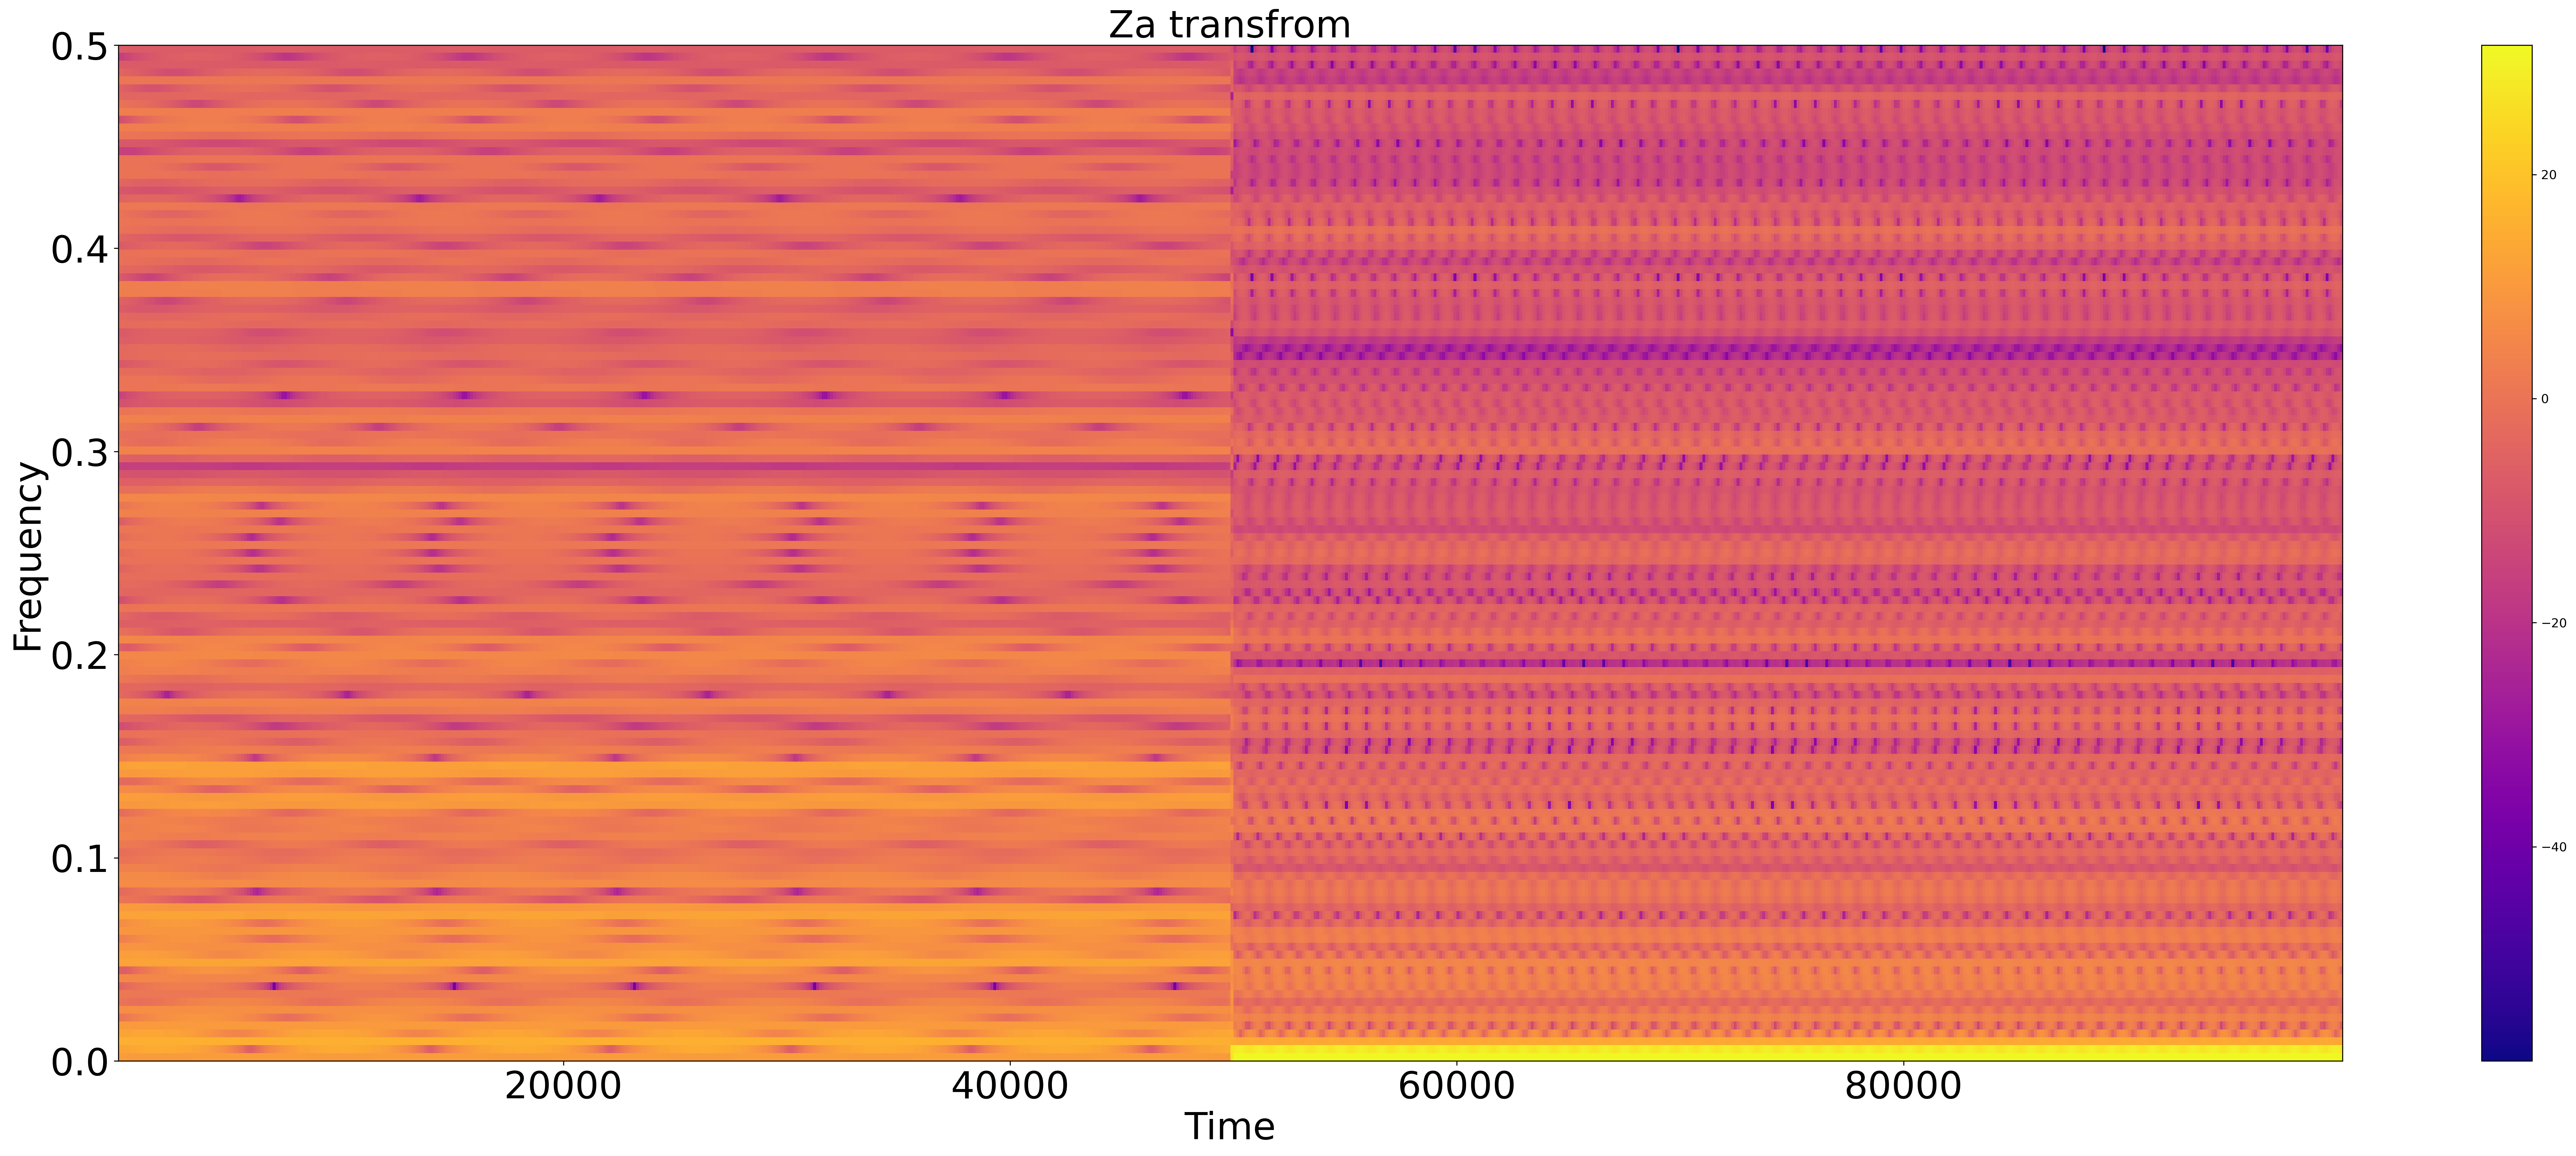

In [30]:
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Xa transfrom',fontsize = 30)  
plt.specgram(mergeData[0],Fs=1,cmap='plasma')
plt.colorbar()
plt.show()

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Ya transfrom',fontsize = 30)  
plt.specgram(mergeData[1],Fs=1,cmap='plasma')
plt.colorbar()
plt.show()

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Za transfrom',fontsize = 30)  
plt.specgram(mergeData[2],Fs=1,cmap='plasma')
plt.colorbar()
plt.show()